# Forest Cover Analysis 
 __By Madhavi Rao__

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Preprocessing](#section3)
4. [Exploratory Data Analysis](#section4)<br>
    - 4.1 [Distribution of Forest Cover Type](#section4_1)<br>
    - 4.2 [Plotting Elevation variation wrt Horizontal_Distance_To_Hydrology](#section4_2)<br>
    - 4.3 [Distribution of all numeric values](#section4_3)<br>
    - 4.4 [Finding Correlations](#section4_4)<br>
    - 4.5 [Pairwise relationship between highly correlated values](#section4_5)<br>
    - 4.6 [Cover Type and Elevation](#section4_6)<br>
    - 4.7 [Violin Plot distribution of Horizontal distance to roadways and Cover Type](#section4_7)<br>
    - 4.8 [Distribution of Wilderness Area types and Cover Type](#section4_8)<br>
    - 4.9 [Distribution of Soil types and Cover Type](#section4_9)<br>
    
5. [Data preparation](#section5)<br>
    - 5.1 [Data standardization](#section5_1)<br>

6. [Model Creation and Evaluation](#section6)<br>
    - 6.1 [Preparing train and test data](#section6_1)<br>
    - 6.2 [Logistic Regression Model over train and test data](#section6_2)<br>
    - 6.3 [Decision Tree alogorithm  over train and test data](#section6_3)<br>
    - 6.4 [Random Forest Model over train and test data](#section6_4)<br>
    - 6.5 [K Nearest Neighbors Model over train and test data](#section6_5)<br>
    - 6.6 [Support Vector Machine Model over train and test data](#section6_6)<br>
    - 6.7 [Naive Bayes Model over train and test dataa](#section6_7)<br>
    - 6.8 [Feature Selection and applying Models](#section6_8)<br>

<a id=section1></a>

## 1. Problem Statement 

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1 - Spruce/Fir

2 - Lodgepole Pine

3 - Ponderosa Pine

4 - Cottonwood/Willow

5 - Aspen

6 - Douglas-fir

7 - Krummholz


<a id=section2></a>

## 2. Data Loading and Description

In [1]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
                                                                                # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns

#


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/Forestcover_train.csv')
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [3]:
df.shape


(15120, 56)

This dataset contains 15120 rows over 56 columns

In [4]:
df.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

<a id=section3></a>

## 3. Preprocessing

In [6]:
#Check if the data has any null/missing values
def lr():
    return df.isna().sum()
lr()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


This data does not have any null or missing values.

In [7]:
#check if there are any columns which have constant valyes or std deviation almost equal to zero.

cols_std=[x for x in df.columns if df[x].std()==0]
print(cols_std)

['Soil_Type7', 'Soil_Type15']


'Soil_Type7', 'Soil_Type15' have no variation in the dataset and these 2 columns may be removed from the dataset for running models.

<a id=section4></a>

## 4. Exploratory Data Analysis

In [8]:
type=df['Cover_Type'].groupby(df['Cover_Type']).count()
type

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

<a id=section4_1></a>

### 4.1. Distribution of Forest Cover Type 

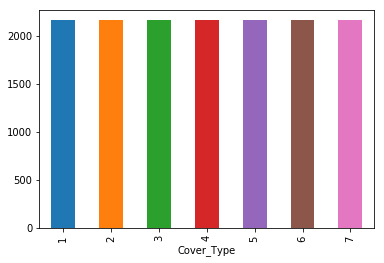

In [9]:
type.plot('bar')

All the seven Forest Cover Types are equally represented in the data.

<a id=section4_2></a>

### 4.2 Plotting Elevation variation wrt Horizontal_Distance_To_Hydrology 

We plot the distribution of cover types wrt Elevation and Horizontal distance to hydrology.
We can make out some distiction between the Cover types as there is variation in elevation ranges

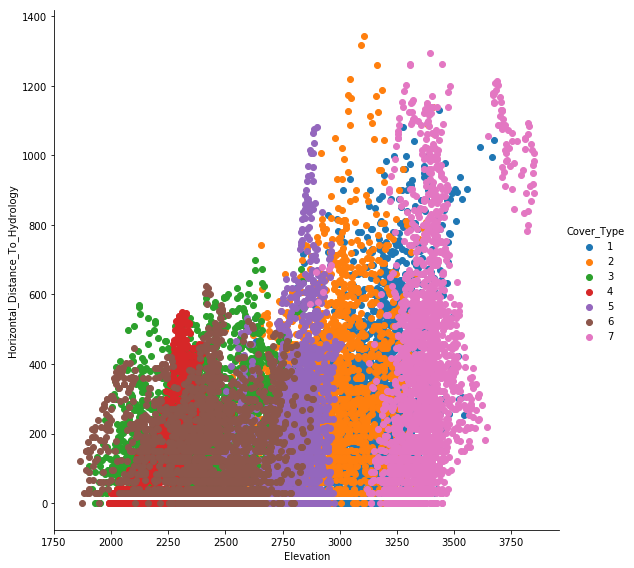

In [10]:
sns.FacetGrid(df, hue="Cover_Type", size=8) \
   .map(plt.scatter, "Elevation", "Horizontal_Distance_To_Hydrology") \
   .add_legend()

<a id=section4_3></a>

### 4.3 Distribution of all numeric values 

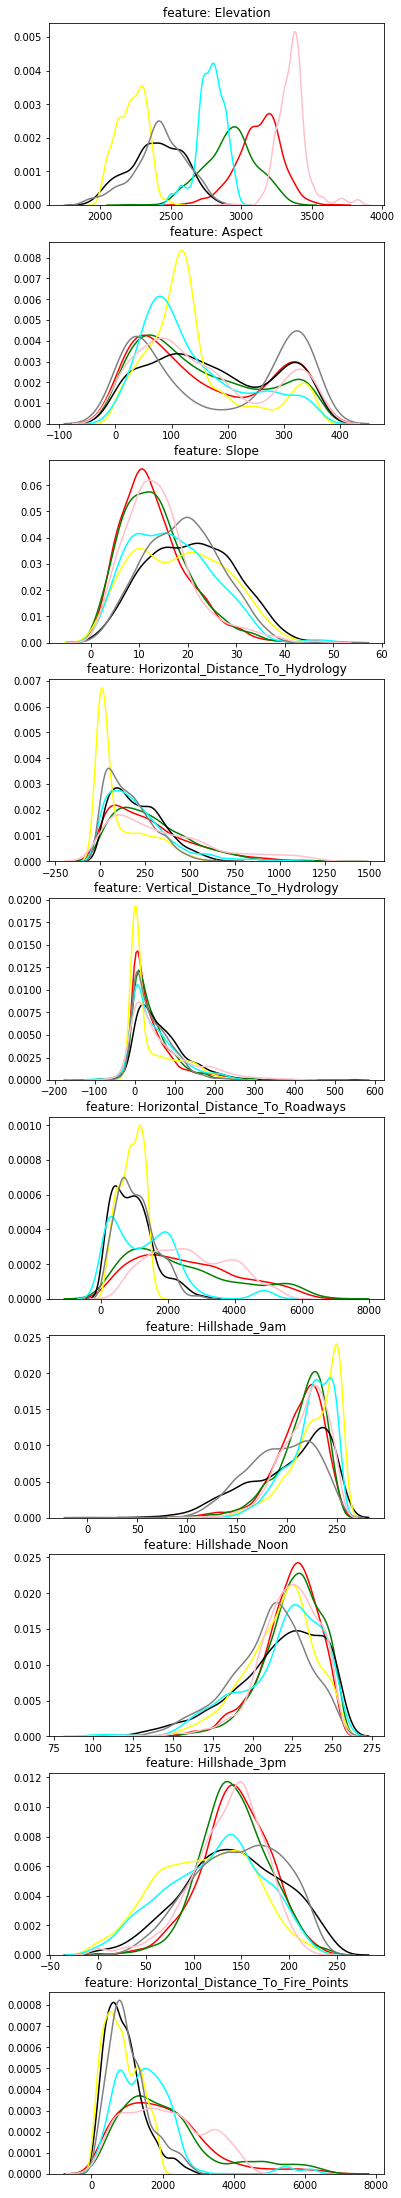

In [11]:
import seaborn as sns
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(df[df.iloc[:,1:11].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(df[col][df.Cover_Type == 1], bins=50, color='red',rug=False, hist=False)
    sns.distplot(df[col][df.Cover_Type == 2], bins=50, color='green',rug=False, hist=False)
    sns.distplot(df[col][df.Cover_Type == 3], bins=50, color='black',rug=False, hist=False)
    sns.distplot(df[col][df.Cover_Type == 4], bins=50, color='yellow',rug=False, hist=False)
    sns.distplot(df[col][df.Cover_Type == 5], bins=50, color='cyan',rug=False, hist=False)
    sns.distplot(df[col][df.Cover_Type == 6], bins=50, color='grey',rug=False, hist=False)
    sns.distplot(df[col][df.Cover_Type == 7], bins=50, color='pink',rug=False, hist=False)
    
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

Features like Elevation,Aspect,Horizontal Distance to Roadways,Hillshade_3pm,Horizontal Distance to Firepoints show variation for Various Cover Types.

<a id=section4_4></a>

### 4.4 Finding Correlations 

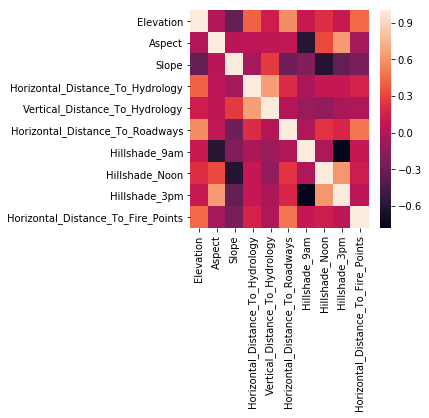

In [12]:
size=11
df1=df.iloc[:,1:size]
corr = df1.corr()
plt.figure(figsize=(4,4))
sns.heatmap(corr) # V
plt.show()
#print(corr)

We see that there are features that are positively correlated as well as features that are negatively correlated.

<a id=section4_5></a>

### 4.5 Pairwise relationship between highly correlated values 

In [13]:

# Set the threshold to select only highly correlated features
threshold = 0.4

# List of pairs for correlation above threshold
corr_list = []
#Search for the highly correlated pairs
for i in range(0,10): #for 'size' features
    for j in range(i+1,10): #avoid repetition
        if (abs(corr.iloc[i,j]) >= threshold and abs(corr.iloc[i,j]) < 1):
            corr_list.append([(corr.iloc[i,j]),i,j])
print(corr_list)

sorted_corr_list = sorted(corr_list,reverse=True)
for i,j,k in sorted_corr_list:
    print ("%s and %s = %.2f" % (df1.columns[j],df1.columns[k],i))


[[0.4127115202982467, 0, 3], [0.5786589907340067, 0, 5], [0.4435634307597476, 0, 9], [-0.5939974281313112, 1, 6], [0.635022364019874, 1, 8], [-0.6126128724172692, 2, 7], [0.6521424712357364, 3, 4], [0.48638564505875065, 5, 9], [-0.779964742447544, 6, 8], [0.6145263872475779, 7, 8]]
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.65
Aspect and Hillshade_3pm = 0.64
Hillshade_Noon and Hillshade_3pm = 0.61
Elevation and Horizontal_Distance_To_Roadways = 0.58
Horizontal_Distance_To_Roadways and Horizontal_Distance_To_Fire_Points = 0.49
Elevation and Horizontal_Distance_To_Fire_Points = 0.44
Elevation and Horizontal_Distance_To_Hydrology = 0.41
Aspect and Hillshade_9am = -0.59
Slope and Hillshade_Noon = -0.61
Hillshade_9am and Hillshade_3pm = -0.78


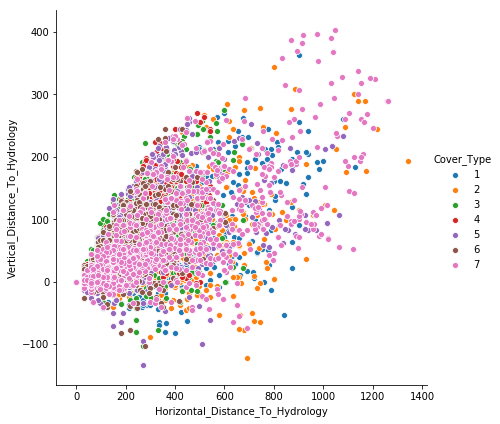

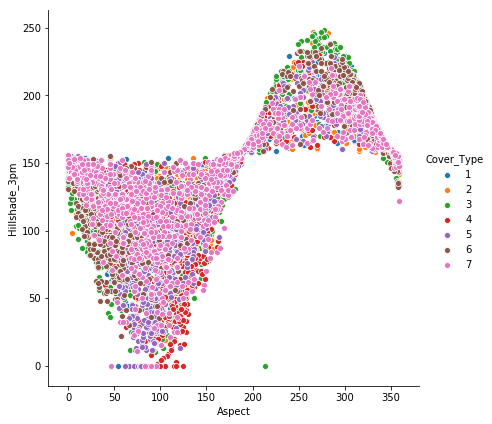

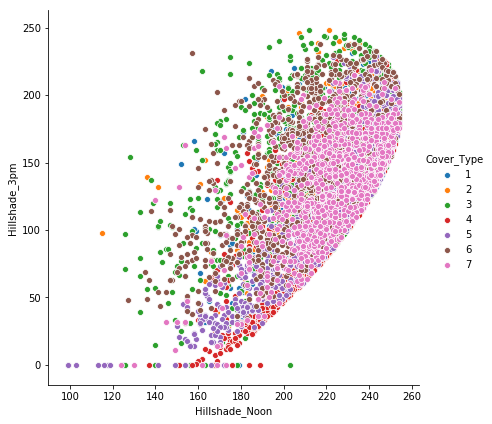

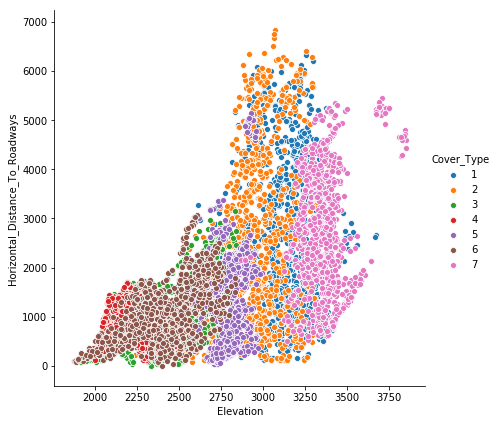

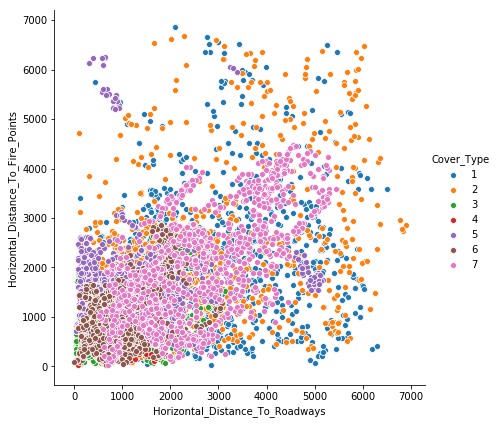

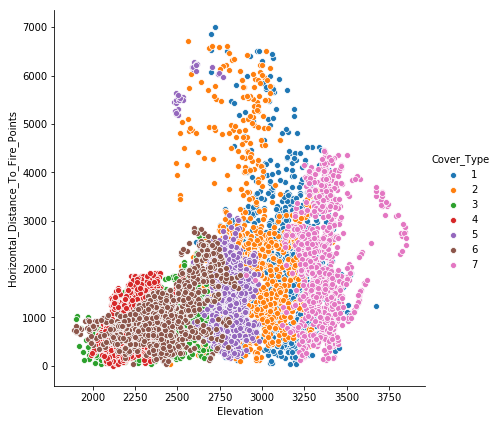

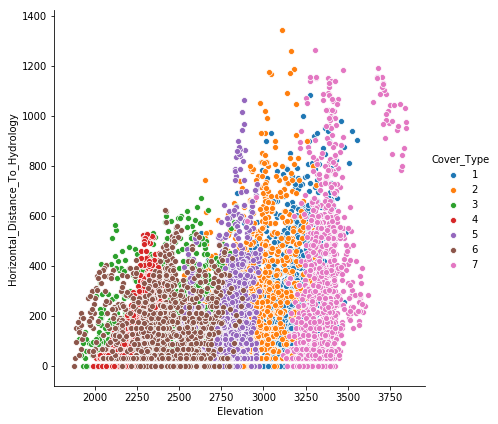

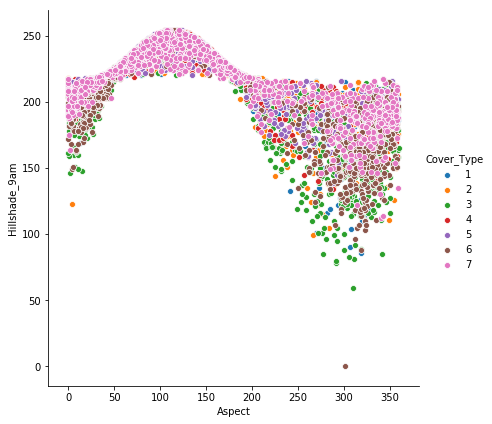

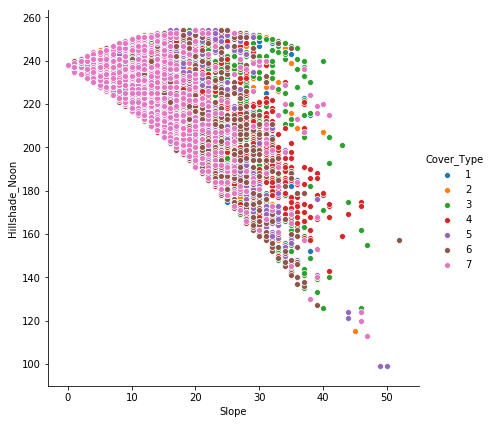

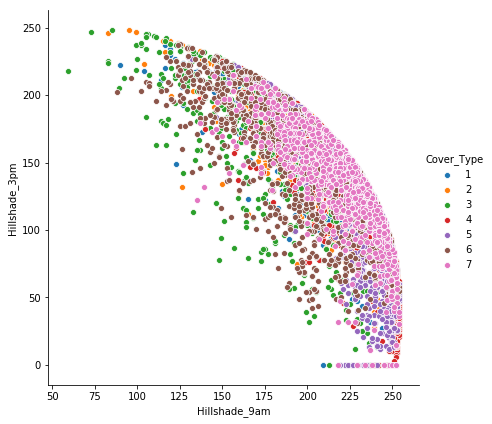

In [14]:
for i,j,k in sorted_corr_list:
    sns.pairplot(df.sample(7000), hue="Cover_Type", size=6, x_vars=df1.columns[j],y_vars=df1.columns[k] )
    plt.show()


We find some interesting patterns for the below.

    a) As the horizontal distance to water bodies increases, the vertical distance also increases . The are linearly correlated.
    b) Horizontal distance to roadways and elevation are linearly correlated.
    c) As elevation increases horizontal distance to firepoints increases.
    d) Horizontal distance to hydrology and elevation shows that Cover type 7 has the highest elevation.
    e) Hillshade at 9 am  is higher when aspect is lower and lower when aspect is higher.
    f) Hillshade at noon decreases with slope.


 <a id=section4_6></a>

### 4.6 Cover Type and Elevation

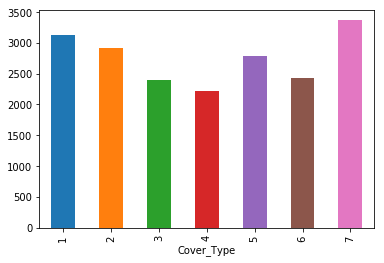

In [16]:
df.groupby('Cover_Type').mean()['Elevation'].plot.bar()


Cover Type 7 has the highest elevation and Cover Type 4 forests have the lowest elevation 

<a id=section4_7></a>

### 4.7 Violin Plot distribution of Horizontal distance to roadways and Cover Type 

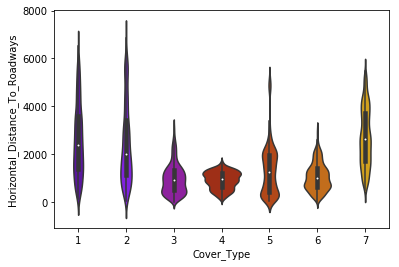

In [19]:
sns.violinplot(x="Cover_Type", y="Horizontal_Distance_To_Roadways",  palette="gnuplot", data=df)
#Elevation and Horizontal_Distance_To_Roadways

 <a id=section4_8></a>

### 4.8 Distribution of Wilderness Area types and Cover Type

In [20]:
rows,cols=df.shape
wilderness_data = pd.DataFrame(index=np.arange(0, rows),columns=['Wilderness_Area_type','Soil_Type','Cover_Type'])
#print(df.head())
for i in range(0,rows):
    for j in range(11,15):
        if (df.iloc[i,j]==1):
            wilderness_data.iloc[i,0]=j-10
    for k in range(15,55):
        if (df.iloc[i,k]==1):
            wilderness_data.iloc[i,1]=k-14
    wilderness_data.iloc[i,2]=df.iloc[i,cols-1]
#print(wilderness_data[0:5])
            

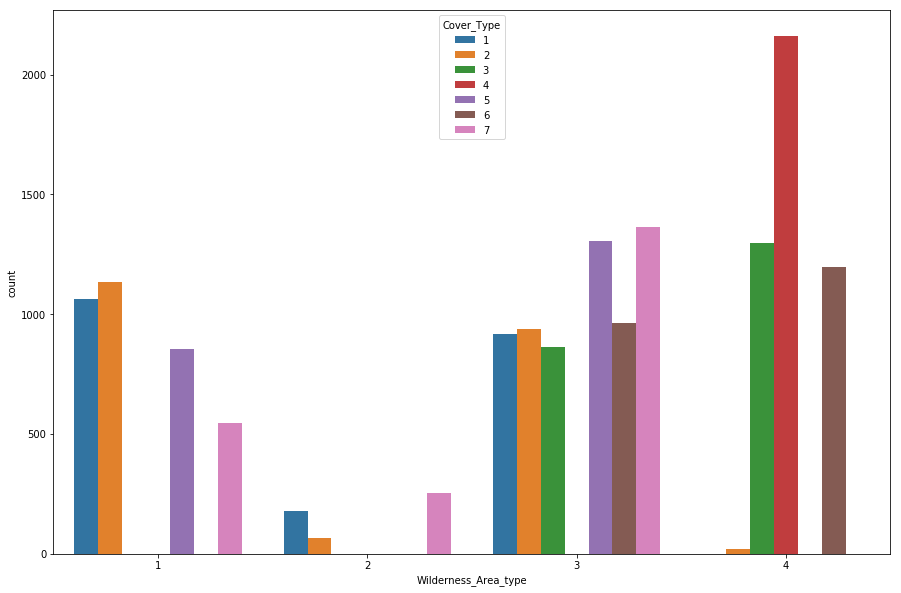

In [21]:
plt.rc("figure", figsize=(15, 10))
sns.countplot(x="Wilderness_Area_type", hue="Cover_Type", data=wilderness_data)
plt.show()

Wilderness  area type 3 covers almost all the forest cover types excepting cover 4.

Wilderness ares type 2 has very less representation of forest covers.

Cover Type 4 is found only in the Wilderness type 4.

 <a id=section4_9></a>

### 4.9 Distribution of Soil types and Cover Type

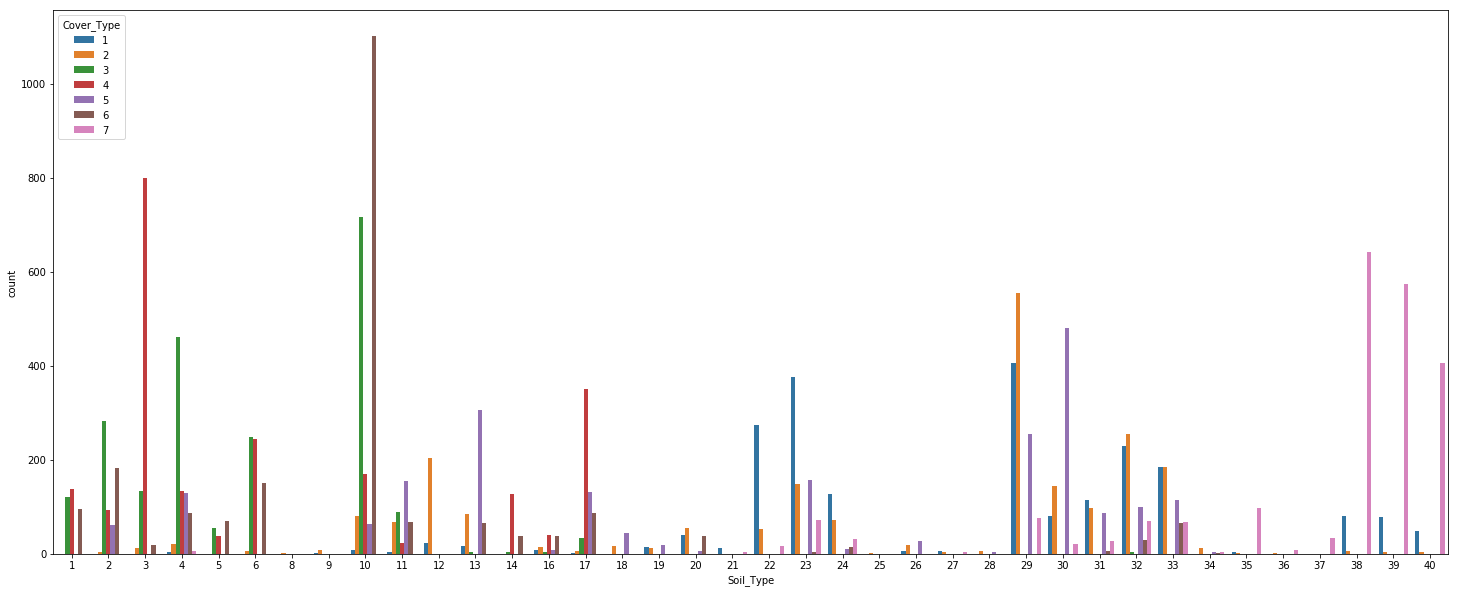

In [22]:
plt.rc("figure", figsize=(25, 10))
sns.countplot(x="Soil_Type", hue="Cover_Type", data=wilderness_data)
plt.show()

Soil Type 4,10,11 can be considered as most versatile as most varieties of forest covers can be seen growing in them.

<a id=section5></a>

## 5. Data preparation

Drop the 'id' column

In [23]:

df=df.drop('Id',axis=1)

In [24]:
df.head(2)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


<a id=section5_1></a>


#### 5.1 Data standardization

We will use Standard Scaler, Min Max scaler to standarize the data and run the algorithms and find out which gives best results.

Using the Min Max scaler to standardize the values first and then apply machine learng models on it :

In [25]:
#checking data skewness
df.skew()

Elevation                               0.075640
Aspect                                  0.450935
Slope                                   0.523658
Horizontal_Distance_To_Hydrology        1.488052
Vertical_Distance_To_Hydrology          1.537776
Horizontal_Distance_To_Roadways         1.247811
Hillshade_9am                          -1.093681
Hillshade_Noon                         -0.953232
Hillshade_3pm                          -0.340827
Horizontal_Distance_To_Fire_Points      1.617099
Wilderness_Area1                        1.231244
Wilderness_Area2                        5.228781
Wilderness_Area3                        0.324594
Wilderness_Area4                        0.825798
Soil_Type1                              6.294716
Soil_Type2                              4.617019
Soil_Type3                              3.575995
Soil_Type4                              3.872721
Soil_Type5                              9.416209
Soil_Type6                              4.506716
Soil_Type7          

In [26]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [27]:
#X = pd.DataFrame(min_max_scaler.fit_transform(prices_corpus), columns = prices_corpus.columns)
df_minmax=df.drop('Cover_Type',axis=1)

In [28]:
df_minmax.head(2)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [29]:
df_minmax = pd.DataFrame(min_max_scaler.fit_transform(df_minmax), columns = df_minmax.columns)
df_minmax.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,0.369084,0.141667,0.057692,0.192107,0.208571,0.074020,0.870079,0.858065,0.596774,0.897898,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.366062,0.155556,0.038462,0.157856,0.200000,0.056604,0.866142,0.877419,0.608871,0.890176,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.473817,0.386111,0.173077,0.199553,0.301429,0.461538,0.921260,0.896774,0.544355,0.875304,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.464250,0.430556,0.346154,0.180194,0.377143,0.448476,0.937008,0.896774,0.491935,0.888174,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.368580,0.125000,0.038462,0.113924,0.207143,0.056749,0.866142,0.870968,0.604839,0.882597,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df_Cover = df.Cover_Type
df_scaled = pd.concat([df_minmax, df_Cover], axis=1)

In [31]:
df_scaled.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0.369084,0.141667,0.057692,0.192107,0.208571,0.074020,0.870079,0.858065,0.596774,0.897898,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.366062,0.155556,0.038462,0.157856,0.200000,0.056604,0.866142,0.877419,0.608871,0.890176,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,0.473817,0.386111,0.173077,0.199553,0.301429,0.461538,0.921260,0.896774,0.544355,0.875304,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.464250,0.430556,0.346154,0.180194,0.377143,0.448476,0.937008,0.896774,0.491935,0.888174,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.368580,0.125000,0.038462,0.113924,0.207143,0.056749,0.866142,0.870968,0.604839,0.882597,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [32]:
#Dropping 'Soil_Type7','Soil_Type15' as they are not represented in out data.
df_scaled=df_scaled.drop(['Soil_Type7','Soil_Type15'],axis=1)


In [33]:
df_scaled.head(2)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0.369084,0.141667,0.057692,0.192107,0.208571,0.074020,0.870079,0.858065,0.596774,0.897898,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.366062,0.155556,0.038462,0.157856,0.200000,0.056604,0.866142,0.877419,0.608871,0.890176,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


<a id=section6></a>

## 6. Model Creation and Evaluation

<a id=section6_1></a>

### 6.1 Preparing train and test data 

In [34]:
#Define the independent variables i.e X.
X = df_scaled.loc[:,df_scaled.columns != 'Cover_Type']

In [35]:
X.shape

(15120, 52)

In [36]:
#define the dependent variable y
y = df_scaled.loc[:,df_scaled.columns == 'Cover_Type']

In [37]:
y.shape

(15120, 1)

In [39]:
#train test data splitting
from sklearn.model_selection import train_test_split
def split_data(X,y):
    return train_test_split(X, y, test_size=0.30, random_state=1)# train test split using train test split of 70:30 and random state=1
X_train, X_test, y_train, y_test = split_data(X,y)

In [40]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10584, 52)
(10584, 1)
(4536, 52)
(4536, 1)


<a id=section6_2></a>

### 6.2 Logistic Regression Model over train and test data 

In [41]:
def logistic_reg( X, y):
    
    X_train, X_test, y_train, y_test = split_data(X,y)
    
    from sklearn.linear_model import LogisticRegression
    
    
    
    # Train multinomial logistic regression mode
    logreg=LogisticRegression(multi_class='multinomial', solver='newton-cg',C=5)
    logreg.fit(X_train, y_train) 
    
    y_pred_train = logreg.predict(X_train)
    y_pred_test = logreg.predict(X_test)  # make predictions on the testing set
    
    from sklearn.metrics import accuracy_score
    print('Accuracy score for train data using Multinomial logistic regression is:', accuracy_score(y_train,y_pred_train))
    print('Accuracy score for test data using Multinomial logistic regression is:', accuracy_score(y_test,y_pred_test))
    
    return logreg

In [42]:
logreg = logistic_reg(X,y)

Accuracy score for train data using Multinomial logistic regression is: 0.7020975056689343
Accuracy score for test data using Multinomial logistic regression is: 0.7001763668430335


We get an accurcay of 70% using multinomial logistic regression.

<a id=section6_3></a>

### 6.3 Decision Tree algorithm  over train and test data 

In [43]:
def dtreeModel(X,y):
    X_train, X_test, y_train, y_test = split_data(X,y)
    from sklearn.tree import DecisionTreeClassifier
    dtree=DecisionTreeClassifier(random_state = 0)
    dtree.fit(X_train, y_train)
    y_pred_train = dtree.predict(X_train)  
    y_pred_test = dtree.predict(X_test) 
    
    from sklearn.metrics import accuracy_score
    print('Accuracy score for train data using Decision Tree algorithm is:', accuracy_score(y_train,y_pred_train))
    print('Accuracy score for test data using Decision Tree algorithm is:', accuracy_score(y_test,y_pred_test))
    
      
    
    return dtree


In [44]:
dtree= dtreeModel(X,y)

Accuracy score for train data using Decision Tree algorithm is: 1.0
Accuracy score for test data using Decision Tree algorithm is: 0.7815255731922398


The accuracy has increased with the use of Decision Trees to 78.1%. Let us try with the Grid Search approach of the Decision tree.

#### Applying Decision Tree model with GridSearchCV

In [45]:
def dtreeModel_usingGridSearch(X,y):
    X_train, X_test, y_train, y_test = split_data(X,y)
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import GridSearchCV
    
    decision_tree_classifier = DecisionTreeClassifier(random_state = 0)
    tree_para =  [{'criterion':['gini','entropy'],'max_depth': range(2,40),  'max_features': ['sqrt', 'log2', None] }]
         
    grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10,refit='AUC')
    grid_search.fit(X_train, y_train)
    
    y_pred_train = grid_search.predict(X_train)  
    y_pred_test = grid_search.predict(X_test) 
    
    from sklearn.metrics import accuracy_score
    print('Accuracy score for train data using Decision Tree GridSearch algorithm is:', accuracy_score(y_train,y_pred_train))
    print('Accuracy score for test data using Decision Tree GridSearch algorithm is:', accuracy_score(y_test,y_pred_test))
    

    return dtree

In [47]:
#dtree_GS= dtreeModel_usingGridSearch(X,y) ##
#Accuracy score for train data using Decision Tree GridSearch algorithm is: 0.9712773998488284
#Accuracy score for test data using Decision Tree GridSearch algorithm is: 0.7771164021164021

The accuracy has not incresed with the use of decision trees Grid Serach CV. We get a score of 77.7%

<a id=section6_4></a>

### 6.4 Random Forest Model over train and test data 

In [48]:
def RFModel(X,y):
    X_train, X_test, y_train, y_test = split_data(X,y)
    from sklearn.ensemble import RandomForestClassifier
    RF=RandomForestClassifier(random_state = 0)
    RF.fit(X_train, y_train)
    y_pred_train = RF.predict(X_train)  
    y_pred_test = RF.predict(X_test) 
    
    from sklearn.metrics import accuracy_score
    print('Accuracy score for train data using Random Forest algorithm is:', accuracy_score(y_train,y_pred_train))
    print('Accuracy score for test data using Random Forest algorithm is:', accuracy_score(y_test,y_pred_test))
    
  
    return RF

In [49]:
rfmodel= RFModel(X,y)

Accuracy score for train data using Random Forest algorithm is: 0.9948979591836735
Accuracy score for test data using Random Forest algorithm is: 0.8278218694885362


The score has significantly incresed to 82.7% with the use of Random Forest algorithm. Let us try to tune the parameters to see if we can make it better.

In [50]:
def RFModel_tune(X,y):
    X_train, X_test, y_train, y_test = split_data(X,y)
    from sklearn.ensemble import RandomForestClassifier
    #RF=RandomForestClassifier(random_state = 0)
    RF=RandomForestClassifier(random_state = 0,
                                n_estimators = 25,
                                min_samples_split = 2,
                                min_samples_leaf = 1)
    RF.fit(X_train, y_train)
    y_pred_train = RF.predict(X_train)  
    y_pred_test = RF.predict(X_test) 
    
    from sklearn.metrics import accuracy_score
    print('Accuracy score for train data using Random Forest(With hyper parameter tuning) algorithm is:', accuracy_score(y_train,y_pred_train))
    print('Accuracy score for test data using Random Forest(With hyper parameter tuning) algorithm is:', accuracy_score(y_test,y_pred_test))
    
    
  
    return RF


In [51]:
rfmodel_hyper_para_tuning= RFModel_tune(X,y)

Accuracy score for train data using Random Forest(With hyper parameter tuning) algorithm is: 0.9996220710506425
Accuracy score for test data using Random Forest(With hyper parameter tuning) algorithm is: 0.8498677248677249


The accuracy has increased after tuning the hyperparameters. We get a score of 84.9 % now.
Let us try with the Random forest CV model

In [52]:
def RFCVModel(X,y):
    X_train, X_test, y_train, y_test = split_data(X,y)
    from sklearn.ensemble import RandomForestClassifier
    RF=RandomForestClassifier(random_state = 0)
    from sklearn.model_selection import RandomizedSearchCV
    from scipy.stats import randint as sp_randint

    param_dist1 = {"max_depth": range(2,5),
                  "min_samples_split": sp_randint(2, 11),
                  "min_samples_leaf": sp_randint(1, 11),
                  "bootstrap": [True, False],
                  "n_estimators": [100, 400, 700, 1000, 1500],
                  "criterion" : ["gini", "entropy"],
                  'max_features': ['sqrt', 'log2', None]
                  }
    param_dist = {"max_depth": range(2,20),
                  "min_samples_split": sp_randint(2, 15),
                  "min_samples_leaf": sp_randint(1, 15),
                  "bootstrap": [True, False],
                  "n_estimators": [100, 400, 700, 1000, 1500],
                  "criterion" : ["gini", "entropy"],
                  'max_features': ['sqrt', 'log2', None]
                  }
    # run randomized search
    n_iter_search = 25 
    random_search = RandomizedSearchCV(RF, param_distributions = param_dist,
                                       n_iter = n_iter_search,
                                       cv = 3, verbose=2,
                                       n_jobs = -1)
    
    random_search.fit(X_train, y_train)
    y_pred_train = random_search.predict(X_train)  
    y_pred_test = random_search.predict(X_test) 
    
    from sklearn.metrics import accuracy_score
    print('Accuracy score for train data using Random Forest(With hyper parameter tuning) algorithm is:', accuracy_score(y_train,y_pred_train))
    print('Accuracy score for test data using Random Forest(With hyper parameter tuning) algorithm is:', accuracy_score(y_test,y_pred_test))
    
    
    
    return random_search

In [ ]:
rf_rand_search_model= RFCVModel(X,y)


# This has a very high training time. Also the accuracy is lower than the random forest with hyper parametre tuning.

# 
#Accuracy score for train data using Random Forest(With hyper parameter tuning) algorithm is: 0.6789493575207861
#Accuracy score for test data using Random Forest(With hyper parameter tuning) algorithm is: 0.6721781305114638

The accuracy we get 83.5 % is still lower than the random forest with hyper parameter tuning. Also this took higher training time .

<a id=section6_5></a>

### 6.5 K Nearest Neighbors Model over train and test data 

In [53]:
accuracy_list = []
def check_n_val(X,y):
    
    import numpy as np
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score
    X_train, X_test, y_train, y_test = split_data(X,y)
    
    for i in range(1,30):
        knn_model_ = KNeighborsClassifier(n_neighbors = i)
        knn_model_.fit(X_train, y_train)
        pred_i = knn_model_.predict(X_test)
        accuracy_list.append(accuracy_score(y_test, pred_i))
        
    print("Maximum accuracy and the corresponding value of k is",max([(v,i+1) for i,v in enumerate(accuracy_list)]),'respectively.')

best_n_for_knn= check_n_val(X,y)

Maximum accuracy and the corresponding value of k is (0.8112874779541446, 1) respectively.


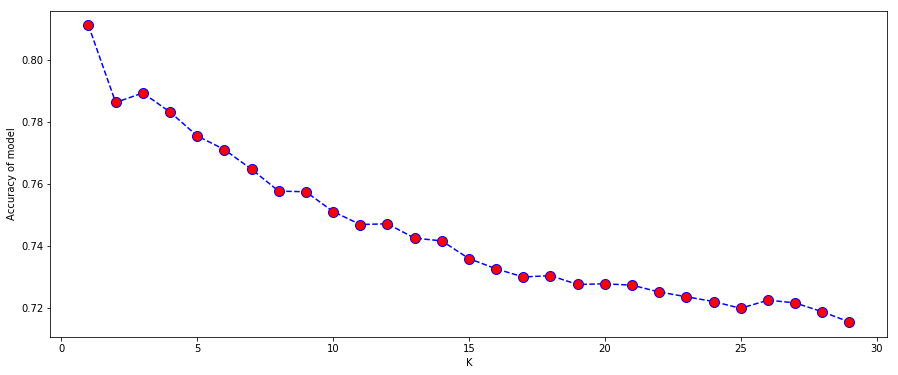

In [54]:

def generate_k_Plot():
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(15,6))
    plt.plot(range(1,30),accuracy_list,color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
    plt.xlabel('K')
    plt.ylabel('Accuracy of model')
    plt.show()
generate_k_Plot()

In [55]:
#KNN
def KNNModel(X,y):
    X_train, X_test, y_train, y_test = split_data(X,y)
    from sklearn.neighbors import KNeighborsClassifier
    
    knn_model1 = KNeighborsClassifier(n_neighbors = 1)
    knn_model1.fit(X_train, y_train)
    

    y_pred_train = knn_model1.predict(X_train)  
    y_pred_test = knn_model1.predict(X_test) 
    
    from sklearn.metrics import accuracy_score
    print('Accuracy score for train data using K Nearest neighbours algorithm is:', accuracy_score(y_train,y_pred_train))
    print('Accuracy score for test data using K Nearest neighbours) algorithm is:', accuracy_score(y_test,y_pred_test))
    
    
    
    return knn_model1

knn_model1= KNNModel(X,y)

Accuracy score for train data using K Nearest neighbours algorithm is: 1.0
Accuracy score for test data using K Nearest neighbours) algorithm is: 0.8112874779541446


The accuracy obtained using KNN is 81.1 %. Let us try to tune this using Randomized search CV .

In [56]:
def KNNModel_CV(X,y):
    X_train, X_test, y_train, y_test = split_data(X,y)
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import RandomizedSearchCV
    param_dist = {                            #  specify parameters and distributions to sample from
                  "algorithm" : ["auto", "ball_tree"],
                  "leaf_size" :  2 ** np.arange(10),
                  "metric" : ["euclidean","manhattan","minkowski","chebyshev"]
                 }
    n_iter_search = 25
    knn_model_ = KNeighborsClassifier(n_neighbors=1)
    knn_model2 = RandomizedSearchCV(knn_model_,random_state = 0, param_distributions = param_dist,     
                                    n_iter = n_iter_search,
                                    n_jobs = -1)
    
    knn_model2.fit(X_train, y_train)
    

    y_pred_train = knn_model2.predict(X_train)  
    y_pred_test = knn_model2.predict(X_test) 
    
    from sklearn.metrics import accuracy_score
    print('Accuracy score for train data using K Nearest neighbours(RandomizedSearchCV) algorithm is:', accuracy_score(y_train,y_pred_train))
    print('Accuracy score for test data using K Nearest neighbours(RandomizedSearchCV) algorithm is:', accuracy_score(y_test,y_pred_test))
        
    
    return knn_model2

knn_model2= KNNModel_CV(X,y)

Accuracy score for train data using K Nearest neighbours(RandomizedSearchCV) algorithm is: 1.0
Accuracy score for test data using K Nearest neighbours(RandomizedSearchCV) algorithm is: 0.8112874779541446


The accuracy of KNN with Randomized Searcg CV has increased to 81.1 %.

<a id=section6_6></a>

### 6.6 Support Vector Machine Model over train and test data 

In [57]:
#SVM
def SVM_Model(X,y):
    X_train, X_test, y_train, y_test = split_data(X,y)
    from sklearn.svm import SVC
    from sklearn import metrics
    
    svc = SVC(random_state = 0) 
    svc.fit(X_train,y_train)
     
    y_pred_train = svc.predict(X_train)  
    y_pred_test = svc.predict(X_test) 
    
    from sklearn.metrics import accuracy_score
    print('Accuracy score for train data using SVM algorithm is:', accuracy_score(y_train,y_pred_train))
    print('Accuracy score for test data using SVM algorithm is:', accuracy_score(y_test,y_pred_test))
    
    
    return svc

svc= SVM_Model(X,y)



Accuracy score for train data using SVM algorithm is: 0.6177248677248677
Accuracy score for test data using SVM algorithm is: 0.6126543209876543


We get an accuracy of 61.2 % using SVM with default parameters. Let us try to tune the parameters. 

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import metrics
def SVC_mean_Score(X,y):
    svc = SVC(kernel='rbf',random_state = 0)
    svc1 = SVC(kernel='poly',random_state = 0)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') 
    scores1 = cross_val_score(svc1, X, y, cv=10, scoring='accuracy') 
    print(scores.mean())
    print(scores1.mean())
    return 

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def CVAccuracy1(gamma_range):
    acc_score=[]
    for g in gamma_range:
        svc = SVC(kernel='rbf', gamma=g)
        scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
        acc_score.append(scores.mean())
    
    plt.plot(gamma_range,acc_score)
    
    plt.xlabel('Value of gamma for SVC ')
    
    plt.xticks(np.arange(0.001,100,5))
    
    plt.ylabel('Cross-Validated Accuracy')
    
    return




In [59]:
gamma_range1=[0.0001,0.001,0.01,0.1,1,10,100]
gamma_range2=[0.0001,0.001,0.01,0.1]
gamma_range3=[0.001,0.005,0.01,0.02]

SVC_mean_Score(X,y)


0.5831349206349207
0.4457010582010582


We get mean score of  58.3 % when 'rbf' kernel  is used and  44.5 % poly kernel is used.

<a id=section6_7></a>

### 6.7 Naive Bayes Model over train and test data 

In [60]:

# Naive Bayes
def NBModel(X,y):
    X_train, X_test, y_train, y_test = split_data(X,y)
    from sklearn.naive_bayes import GaussianNB
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    

    y_pred_train = nb_model.predict(X_train)  
    y_pred_test = nb_model.predict(X_test) 
    
    from sklearn.metrics import accuracy_score
    print('Accuracy score for train data using Naive Bayes algorithm is:', accuracy_score(y_train,y_pred_train))
    print('Accuracy score for test data using Naive Bayes algorithm is:', accuracy_score(y_test,y_pred_test))
        
    
    return nb_model

nb_model= NBModel(X,y)

Accuracy score for train data using Naive Bayes algorithm is: 0.47590702947845803
Accuracy score for test data using Naive Bayes algorithm is: 0.4711199294532628


We get a accuracy of 47.1 % using Naive Bayes algorithm.

<a id=section6_8></a>

### 6.8 Feature Selection and applying Models  

We will first use PCA (Principle component analysis) to find out the important features and re run all the algorithms.


In [61]:
X.shape

(15120, 52)

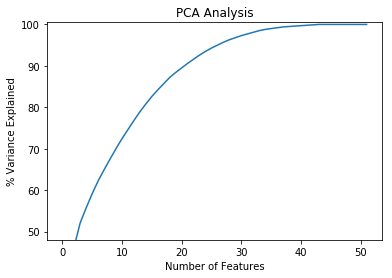

In [62]:
#df_scaled
import numpy as np

def PCA_analysis(X):
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt
    %matplotlib inline 
    
    pca = PCA(52,random_state =0)
    pca.fit(X)
    var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

    plt.ylabel('% Variance Explained')
    plt.xlabel('Number of Features')
    plt.title('PCA Analysis')
    plt.ylim(48,100.5)
    plt.style.context('seaborn-whitegrid')

    plt.plot(var)

    return plt.show()
PCA_analysis(X)

Let us choose 40 as optimum number of features number of principal components 

In [63]:
from sklearn.decomposition import PCA
def PCA_apply():
    pca = PCA(n_components=40, random_state = 0)
    pca.fit(X)
    return pca.transform(X)
X = PCA_apply()
print(X.shape)

(15120, 40)


In [64]:
X_train, X_test, y_train, y_test = split_data(X,y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train.head(2))

We run all the above models with the new train test data post PCA dimentionality reduction

In [65]:
logreg = logistic_reg(X,y)

Accuracy score for train data using Multinomial logistic regression is: 0.6963340891912321
Accuracy score for test data using Multinomial logistic regression is: 0.6951058201058201


Logistic regression gives accuracy 69.5 %.

In [66]:
dtree= dtreeModel(X,y)

Accuracy score for train data using Decision Tree algorithm is: 1.0
Accuracy score for test data using Decision Tree algorithm is: 0.76168430335097


Decision Trees algorith gives 76 % accuracy

In [67]:
dtree_GS= dtreeModel_usingGridSearch(X,y)

Accuracy score for train data using Decision Tree GridSearch algorithm is: 0.9394368858654573
Accuracy score for test data using Decision Tree GridSearch algorithm is: 0.7572751322751323


Decision Trees using grid Search CV gives an accuracy of 75.7%

In [68]:
rfmodel= RFModel(X,y)

Accuracy score for train data using Random Forest algorithm is: 0.9925359032501889
Accuracy score for test data using Random Forest algorithm is: 0.8172398589065256


Random Forest gives score of 81.7 %

In [69]:
rfmodel_hyper_para_tuning= RFModel_tune(X,y)

Accuracy score for train data using Random Forest(With hyper parameter tuning) algorithm is: 0.9989606953892668
Accuracy score for test data using Random Forest(With hyper parameter tuning) algorithm is: 0.8357583774250441


In [70]:
#rf_rand_search_model= RFCVModel(X,y)  #


Random Forest after hyper parameter tuning gives 83.5 %

Maximum accuracy and the corresponding value of k is (0.806657848324515, 1) respectively.


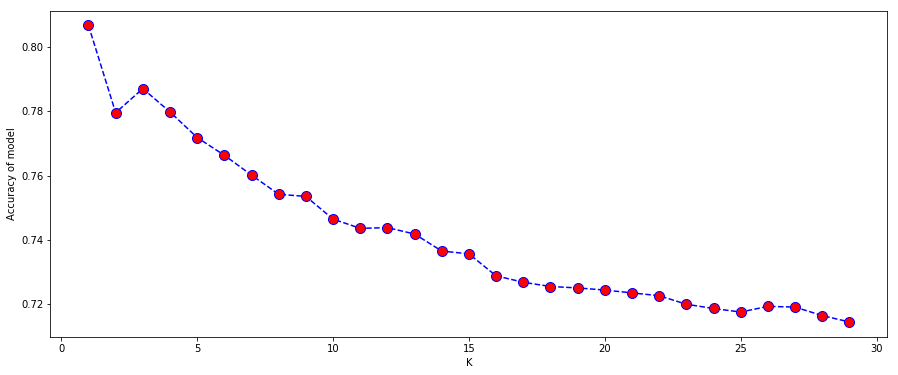

In [71]:
accuracy_list = []
best_n_for_knn= check_n_val(X,y)
import matplotlib.pyplot as plt
%matplotlib inline
def generate():
    plt.figure(figsize=(15,6))
    plt.plot(range(1,30),accuracy_list,color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
    plt.xlabel('K')
    plt.ylabel('Accuracy of model')
    plt.show()
generate()

In [72]:
knn_model1= KNNModel(X,y)

Accuracy score for train data using K Nearest neighbours algorithm is: 1.0
Accuracy score for test data using K Nearest neighbours) algorithm is: 0.806657848324515


KNN gives accuracy score of 80.6 %

In [73]:
svc= SVM_Model(X,y)


Accuracy score for train data using SVM algorithm is: 0.6195200302343159
Accuracy score for test data using SVM algorithm is: 0.6161816578483245


SVM model scores 61.6 % accuracy.

In [74]:
SVC_mean_Score(X,y)


0.5840608465608466
0.43320105820105825


In [75]:
nb_model= NBModel(X,y)

Accuracy score for train data using Naive Bayes algorithm is: 0.5858843537414966
Accuracy score for test data using Naive Bayes algorithm is: 0.5831128747795414


Naive Bayes Model scores 58.3 % 

#### Feature Selection based on dimensions which add more value to distinguishing of Cover Types.

In [76]:
#Feature Selection based on important features
drop_list=['Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Hillshade_9am','Hillshade_Noon','Cover_Type']
X_f = df_scaled.drop(drop_list,axis=1)
y_f = df_scaled.loc[:,df_scaled.columns == 'Cover_Type']
X_train, X_test, y_train, y_test = split_data(X_f,y_f)


In [77]:
logreg = logistic_reg(X_f,y_f)

Accuracy score for train data using Multinomial logistic regression is: 0.6828231292517006
Accuracy score for test data using Multinomial logistic regression is: 0.6774691358024691


In [78]:
 dtree= dtreeModel(X_f,y_f)

Accuracy score for train data using Decision Tree algorithm is: 1.0
Accuracy score for test data using Decision Tree algorithm is: 0.7658730158730159


In [79]:
rfmodel= RFModel(X,y)


Accuracy score for train data using Random Forest algorithm is: 0.9925359032501889
Accuracy score for test data using Random Forest algorithm is: 0.8172398589065256


In [80]:
 rfmodel_hyper_para_tuning= RFModel_tune(X_f,y_f)

Accuracy score for train data using Random Forest(With hyper parameter tuning) algorithm is: 0.9989606953892668
Accuracy score for test data using Random Forest(With hyper parameter tuning) algorithm is: 0.8408289241622575


Maximum accuracy and the corresponding value of k is (0.806657848324515, 1) respectively.


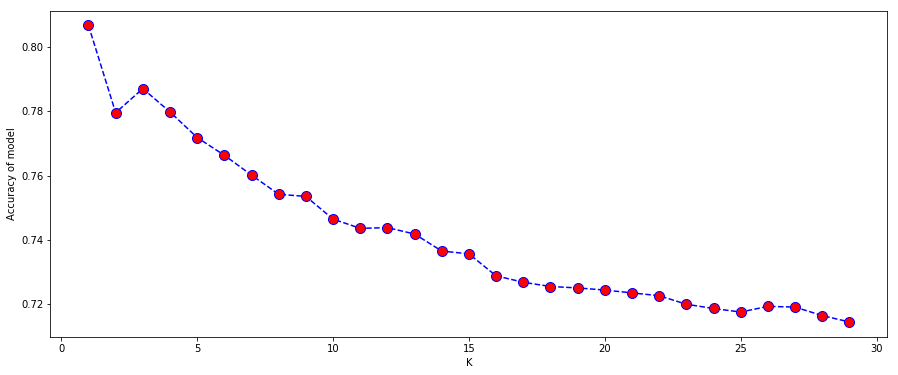

Accuracy score for train data using K Nearest neighbours algorithm is: 1.0
Accuracy score for test data using K Nearest neighbours) algorithm is: 0.806657848324515


In [81]:
accuracy_list = []
best_n_for_knn= check_n_val(X,y)
generate_k_Plot()
knn_model1= KNNModel(X,y)


In [82]:
svc= SVM_Model(X_f,y_f)


Accuracy score for train data using SVM algorithm is: 0.61281179138322
Accuracy score for test data using SVM algorithm is: 0.6086860670194003


In [83]:
SVC_mean_Score(X_f,y_f)

0.5803571428571429
0.39768518518518514


In [84]:
nb_model= NBModel(X_f,y_f)

Accuracy score for train data using Naive Bayes algorithm is: 0.47401738473167043
Accuracy score for test data using Naive Bayes algorithm is: 0.4673721340388007


Logistic regression gives accuracy 67.7 %.

Decision Trees algorith gives 76.6 % accuracy

Random Forest gives score of 81.7 %

Random Forest after hyper parameter tuning gives 84.10 %

KNN gives accuracy score of 80.6 %

SVM model scores 60.8 % accuracy.

Naive Bayes Model scores 46.7 %

#### Feature Selection based on important features using a different drop list

In [85]:
#Feature Selection based on important features
drop_list=['Aspect','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Hillshade_9am','Hillshade_Noon','Cover_Type']
X_f = df_scaled[['Elevation','Hillshade_3pm','Horizontal_Distance_To_Hydrology','Horizontal_Distance_To_Fire_Points']]
y_f = df_scaled.loc[:,df_scaled.columns == 'Cover_Type']
X_train, X_test, y_train, y_test = split_data(X_f,y_f)

Accuracy score for train data using Multinomial logistic regression is: 0.5962773998488284
Accuracy score for test data using Multinomial logistic regression is: 0.5947971781305115
Accuracy score for train data using Decision Tree algorithm is: 1.0
Accuracy score for test data using Decision Tree algorithm is: 0.666005291005291
Accuracy score for train data using Random Forest algorithm is: 0.9925359032501889
Accuracy score for test data using Random Forest algorithm is: 0.8172398589065256
Accuracy score for train data using Random Forest(With hyper parameter tuning) algorithm is: 0.9982048374905518
Accuracy score for test data using Random Forest(With hyper parameter tuning) algorithm is: 0.7411816578483245
Maximum accuracy and the corresponding value of k is (0.806657848324515, 1) respectively.


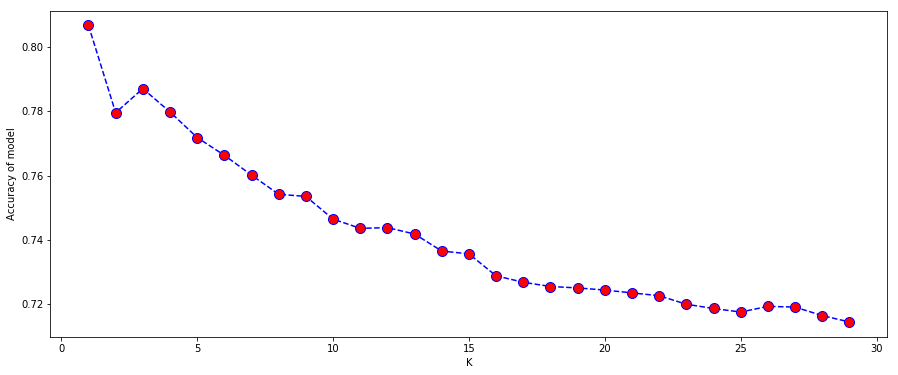

Accuracy score for train data using K Nearest neighbours algorithm is: 1.0
Accuracy score for test data using K Nearest neighbours) algorithm is: 0.806657848324515
Accuracy score for train data using SVM algorithm is: 0.6075207860922147
Accuracy score for test data using SVM algorithm is: 0.607583774250441
0.5902116402116402
0.47949735449735453
Accuracy score for train data using Naive Bayes algorithm is: 0.5871126228269086
Accuracy score for test data using Naive Bayes algorithm is: 0.5921516754850088


In [86]:
logreg = logistic_reg(X_f,y_f)
dtree= dtreeModel(X_f,y_f)
rfmodel= RFModel(X,y)
rfmodel_hyper_para_tuning= RFModel_tune(X_f,y_f)
accuracy_list = []
best_n_for_knn= check_n_val(X,y)
generate_k_Plot()
knn_model1= KNNModel(X,y)
svc= SVM_Model(X_f,y_f)
SVC_mean_Score(X_f,y_f)
nb_model= NBModel(X_f,y_f)

Logistic regression gives accuracy 59.4 %.

Decision Trees algorith gives 66.5 % accuracy

Random Forest gives score of 81.7 %

Random Forest after hyper parameter tuning gives 74.1 %

KNN gives accuracy score of 80.6 %

SVM model scores 60.7 % accuracy.

Naive Bayes Model scores 59.2 %

#### Data standardization using Standard Scaler

In [87]:
#Using Standard Scaler
from sklearn.preprocessing import StandardScaler
X = pd.DataFrame()
df_std_sc=df.drop(['Cover_Type','Soil_Type7','Soil_Type15'],axis=1)	
standardized = StandardScaler()
standardized.fit(df_std_sc)
X = standardized.transform(df_std_sc)
#df_std_scaled = pd.concat([df_std_sc, df_Cover], axis=1)
    


In [88]:
y = df.loc[:,df.columns == 'Cover_Type']
print(y.head(2))

   Cover_Type
0           5
1           5


In [89]:
X_train, X_test, y_train, y_test = split_data(X,y) 


#### Running all the models with this train and test data.

In [90]:
logreg = logistic_reg(X,y)

Accuracy score for train data using Multinomial logistic regression is: 0.7174981103552532
Accuracy score for test data using Multinomial logistic regression is: 0.7076719576719577


In [91]:
dtree= dtreeModel(X,y)

Accuracy score for train data using Decision Tree algorithm is: 1.0
Accuracy score for test data using Decision Tree algorithm is: 0.7821869488536155


In [92]:
rfmodel= RFModel(X,y)


Accuracy score for train data using Random Forest algorithm is: 0.9947089947089947
Accuracy score for test data using Random Forest algorithm is: 0.828042328042328


In [93]:
rfmodel_hyper_para_tuning= RFModel_tune(X,y)


Accuracy score for train data using Random Forest(With hyper parameter tuning) algorithm is: 0.9996220710506425
Accuracy score for test data using Random Forest(With hyper parameter tuning) algorithm is: 0.8509700176366843


Maximum accuracy and the corresponding value of k is (0.8048941798941799, 1) respectively.


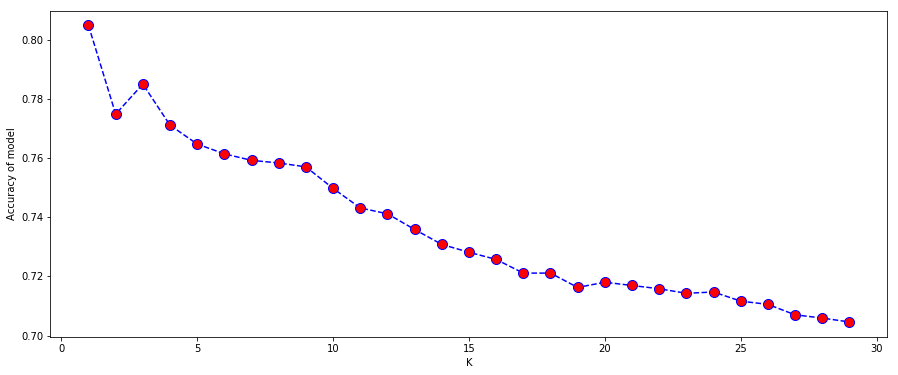

Accuracy score for train data using K Nearest neighbours algorithm is: 1.0
Accuracy score for test data using K Nearest neighbours) algorithm is: 0.8048941798941799


In [94]:
accuracy_list = []
best_n_for_knn= check_n_val(X,y)
generate_k_Plot()
knn_model1= KNNModel(X,y)


    

In [95]:
svc= SVM_Model(X,y)
SVC_mean_Score(X,y)
nb_model= NBModel(X,y)

Accuracy score for train data using SVM algorithm is: 0.7434807256235828
Accuracy score for test data using SVM algorithm is: 0.7305996472663139
0.6737433862433863
0.6527116402116402
Accuracy score for train data using Naive Bayes algorithm is: 0.4736394557823129
Accuracy score for test data using Naive Bayes algorithm is: 0.4697971781305115


In [96]:
svc= SVM_Model(X,y)

Accuracy score for train data using SVM algorithm is: 0.7434807256235828
Accuracy score for test data using SVM algorithm is: 0.7305996472663139


Standard scaler is giving better accuarcy as when compared to data scaled with Min max scaler

Logistic regression gives accuracy 70.7 %.

Decision Trees algorith gives 78.1 % accuracy

Random Forest gives score of 82.8 %

Random Forest after hyper parameter tuning gives 85 %

KNN gives accuracy score of 80.6 %

SVM model scores 73 % accuracy.

Naive Bayes Model scores 46.9 %

### Prediction result:
The error values have not decreased with running models with selected features. 
The accuracy of the models were better when __all the features__ were considered.
Hence we will consider all the features.
Also we will use __standard scaler__ method to standardize values.

Also __Random Forest__ is giving the highest accuracy compared to other models with  score of "__85 %__"  hence we choose the algorithm for prediction of Forest Cover Types.

n_estimators = 25

min_samples_split = 2

min_samples_leaf = 1